In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.inspection import PartialDependenceDisplay

import warnings
warnings.filterwarnings('ignore')

import pickle

In [3]:
df = pd.read_csv("/content/IndianWeatherRepository.csv")
df

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,...,12.6,18.5,1,2,5:59 AM,6:41 PM,5:42 PM,3:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,...,10.7,14.2,1,1,6:00 AM,6:40 PM,5:39 PM,3:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,29-08-2023 10:45,26.3,79.3,...,16.8,20.7,2,2,5:56 AM,6:34 PM,5:32 PM,3:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,29-08-2023 10:45,25.6,78.1,...,4.9,6.6,1,1,6:00 AM,6:38 PM,5:36 PM,3:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.2,81.0,...,11.4,14.8,1,1,6:01 AM,6:39 PM,5:38 PM,3:42 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15863,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1695680100,26-09-2023 03:45,27.0,80.6,...,283.4,402.8,6,10,6:09 AM,6:13 PM,3:42 PM,1:08 AM,Waxing Gibbous,74
15864,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1695680100,26-09-2023 03:45,21.3,70.4,...,16.3,17.0,2,2,5:09 AM,5:14 PM,2:28 PM,12:17 AM,Waxing Gibbous,74
15865,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1695680100,26-09-2023 03:45,25.6,78.0,...,6.0,8.8,1,1,6:02 AM,6:07 PM,3:00 PM,1:38 AM,Waxing Gibbous,74
15866,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1695680100,26-09-2023 03:45,22.1,71.8,...,4.1,4.9,1,1,6:10 AM,6:15 PM,3:01 PM,1:55 AM,Waxing Gibbous,74


In [4]:
df.columns.to_list()

['country',
 'location_name',
 'region',
 'latitude',
 'longitude',
 'timezone',
 'last_updated_epoch',
 'last_updated',
 'temperature_celsius',
 'temperature_fahrenheit',
 'condition_text',
 'wind_mph',
 'wind_kph',
 'wind_degree',
 'wind_direction',
 'pressure_mb',
 'pressure_in',
 'precip_mm',
 'precip_in',
 'humidity',
 'cloud',
 'feels_like_celsius',
 'feels_like_fahrenheit',
 'visibility_km',
 'visibility_miles',
 'uv_index',
 'gust_mph',
 'gust_kph',
 'air_quality_Carbon_Monoxide',
 'air_quality_Ozone',
 'air_quality_Nitrogen_dioxide',
 'air_quality_Sulphur_dioxide',
 'air_quality_PM2.5',
 'air_quality_PM10',
 'air_quality_us-epa-index',
 'air_quality_gb-defra-index',
 'sunrise',
 'sunset',
 'moonrise',
 'moonset',
 'moon_phase',
 'moon_illumination']

In [5]:
df['region'].unique()

array(['Madhya Pradesh', 'Uttar Pradesh', 'Orissa', 'Rajasthan',
       'Gujarat', 'Himachal Pradesh', 'Chhattisgarh', 'Jammu and Kashmir',
       'Daman and Diu', 'Dadra and Nagar Haveli', 'Andhra Pradesh',
       'Jharkhand', 'Bihar', 'West Bengal', 'Maharashtra', 'Haryana',
       'Chandigarh', 'Goa', 'Andaman and Nicobar Islands',
       'Arunachal Pradesh', 'Assam', 'Puducherry', 'Kerala', 'Mizoram',
       'Manipur', 'Nagaland', 'Tripura', 'Karnataka', 'Uttarakhand',
       'Lakshadweep', 'Punjab', 'Tamil Nadu', 'Delhi'], dtype=object)

In [6]:
df["region"].nunique()

33

In [7]:
df['wind_direction'].nunique()

16

#EXPLORATORY DATA ANALYSIS

In [8]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,15868.000000,15868.000000,1.586800e+04,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,...,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000
mean,23.101816,80.237048,1.694477e+09,24.765314,76.577659,5.900649,9.499943,186.721830,1005.344845,29.687027,...,15.856201,534.627426,25.708401,8.442267,4.893849,38.170582,46.212635,2.114885,3.787056,46.595727
std,5.795698,5.758379,7.197810e+05,3.794186,6.829476,3.452184,5.550549,97.487885,3.065070,0.090421,...,8.631677,459.515519,21.540349,8.908646,12.246430,49.061351,56.859891,1.189849,3.271611,35.741011
min,8.080000,68.970000,1.693286e+09,-4.200000,24.500000,2.200000,3.600000,1.000000,997.000000,29.440000,...,0.000000,113.500000,0.000000,0.000000,0.000000,0.500000,0.700000,1.000000,1.000000,0.000000
25%,20.270000,76.070000,1.693870e+09,23.400000,74.000000,3.100000,5.000000,94.000000,1003.000000,29.620000,...,9.700000,263.700000,10.500000,3.000000,0.800000,8.700000,11.500000,1.000000,1.000000,14.000000
50%,23.970000,78.670000,1.694473e+09,25.000000,77.100000,5.100000,8.300000,213.000000,1005.000000,29.680000,...,14.800000,407.200000,21.500000,5.700000,2.100000,21.750000,27.800000,2.000000,2.000000,41.000000
75%,26.770000,83.900000,1.695077e+09,27.000000,80.600000,7.600000,12.200000,267.000000,1007.000000,29.740000,...,20.800000,674.300000,35.100000,10.900000,4.900000,49.300000,59.425000,3.000000,6.000000,79.000000
max,34.570000,95.800000,1.695680e+09,38.300000,100.900000,25.700000,41.400000,360.000000,1021.000000,30.140000,...,71.600000,11642.500000,171.700000,141.200000,541.700000,899.500000,1043.700000,6.000000,10.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15868 entries, 0 to 15867
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       15868 non-null  object 
 1   location_name                 15868 non-null  object 
 2   region                        15868 non-null  object 
 3   latitude                      15868 non-null  float64
 4   longitude                     15868 non-null  float64
 5   timezone                      15868 non-null  object 
 6   last_updated_epoch            15868 non-null  int64  
 7   last_updated                  15868 non-null  object 
 8   temperature_celsius           15868 non-null  float64
 9   temperature_fahrenheit        15868 non-null  float64
 10  condition_text                15868 non-null  object 
 11  wind_mph                      15868 non-null  float64
 12  wind_kph                      15868 non-null  float64
 13  w

In [10]:
numerical = df.select_dtypes(include=['number'])
numerical

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,24.57,77.72,1693286100,27.5,81.5,12.8,20.5,281,1008,29.77,...,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1,2,93
1,23.33,77.80,1693286100,27.5,81.5,9.6,15.5,287,1008,29.78,...,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1,1,93
2,22.07,78.93,1693286100,26.3,79.3,11.4,18.4,317,1009,29.78,...,21.2,220.3,57.2,0.6,1.7,16.8,20.7,2,2,93
3,21.86,77.93,1693286100,25.6,78.1,10.5,16.9,297,1009,29.80,...,20.9,200.3,25.0,1.2,1.1,4.9,6.6,1,1,93
4,22.75,77.72,1693286100,27.2,81.0,10.1,16.2,274,1009,29.79,...,18.7,257.0,30.8,2.2,1.8,11.4,14.8,1,1,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15863,28.88,77.53,1695680100,27.0,80.6,2.2,3.6,10,1007,29.74,...,7.4,2643.6,0.0,45.9,33.9,283.4,402.8,6,10,74
15864,23.97,92.58,1695680100,21.3,70.4,2.2,3.6,122,1008,29.77,...,3.4,280.4,0.1,2.0,0.4,16.3,17.0,2,2,74
15865,12.93,79.33,1695680100,25.6,78.0,5.8,9.4,305,1006,29.70,...,16.6,367.2,11.4,7.9,1.3,6.0,8.8,1,1,74
15866,8.97,77.30,1695680100,22.1,71.8,7.6,12.2,262,1008,29.77,...,21.3,208.6,21.8,3.1,0.9,4.1,4.9,1,1,74


In [11]:
numerical = numerical.drop(["temperature_fahrenheit", "wind_mph", "pressure_in", "precip_mm", "feels_like_fahrenheit", "gust_mph", "visibility_miles"], axis=1)
numerical

,latitude,longitude,last_updated_epoch,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_in,humidity,cloud,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,24.57,77.72,1693286100,27.5,20.5,281,1008,0.00,67,26,...,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1,2,93
1,23.33,77.80,1693286100,27.5,15.5,287,1008,0.00,70,19,...,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1,1,93
2,22.07,78.93,1693286100,26.3,18.4,317,1009,0.00,70,51,...,21.2,220.3,57.2,0.6,1.7,16.8,20.7,2,2,93
3,21.86,77.93,1693286100,25.6,16.9,297,1009,0.00,76,65,...,20.9,200.3,25.0,1.2,1.1,4.9,6.6,1,1,93
4,22.75,77.72,1693286100,27.2,16.2,274,1009,0.00,74,82,...,18.7,257.0,30.8,2.2,1.8,11.4,14.8,1,1,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15863,28.88,77.53,1695680100,27.0,3.6,10,1007,0.00,84,25,...,7.4,2643.6,0.0,45.9,33.9,283.4,402.8,6,10,74
15864,23.97,92.58,1695680100,21.3,3.6,122,1008,0.00,99,100,...,3.4,280.4,0.1,2.0,0.4,16.3,17.0,2,2,74
15865,12.93,79.33,1695680100,25.6,9.4,305,1006,0.01,79,81,...,16.6,367.2,11.4,7.9,1.3,6.0,8.8,1,1,74
15866,8.97,77.30,1695680100,22.1,12.2,262,1008,0.00,90,28,...,21.3,208.6,21.8,3.1,0.9,4.1,4.9,1,1,74


In [12]:
numerical = numerical.drop(["latitude", "longitude","last_updated_epoch","moon_illumination","air_quality_us-epa-index", "air_quality_gb-defra-index","uv_index","gust_kph"], axis=1)


##UNIVARIATE ANALYSIS

array([[<Axes: title={'center': 'temperature_celsius'}>,
        <Axes: title={'center': 'wind_kph'}>,
        <Axes: title={'center': 'wind_degree'}>,
        <Axes: title={'center': 'pressure_mb'}>],
       [<Axes: title={'center': 'precip_in'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'feels_like_celsius'}>],
       [<Axes: title={'center': 'visibility_km'}>,
        <Axes: title={'center': 'air_quality_Carbon_Monoxide'}>,
        <Axes: title={'center': 'air_quality_Ozone'}>,
        <Axes: title={'center': 'air_quality_Nitrogen_dioxide'}>],
       [<Axes: title={'center': 'air_quality_Sulphur_dioxide'}>,
        <Axes: title={'center': 'air_quality_PM2.5'}>,
        <Axes: title={'center': 'air_quality_PM10'}>, <Axes: >]],
      dtype=object)

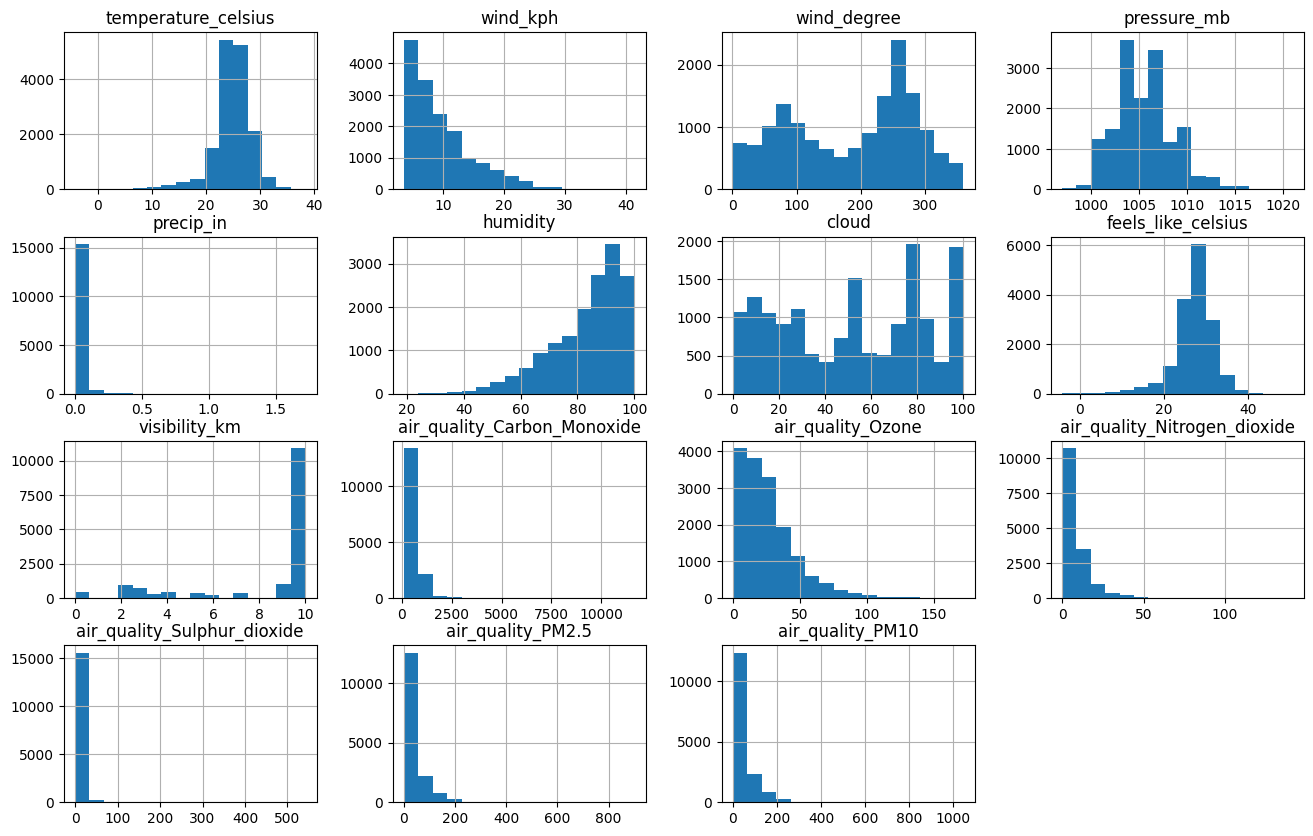

In [13]:
numerical.hist(bins=16, figsize=(16,10))

###Scatter Plots

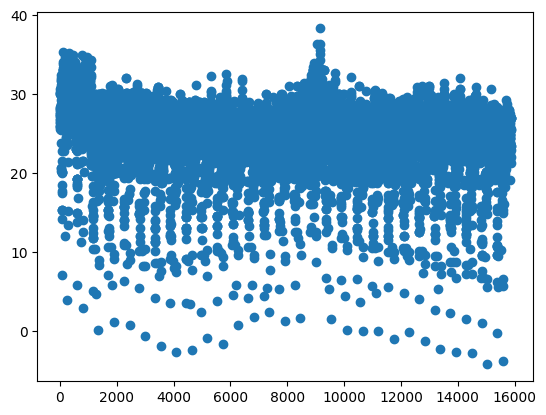

In [14]:
plt.scatter(df.index, df['temperature_celsius'])
plt.show()

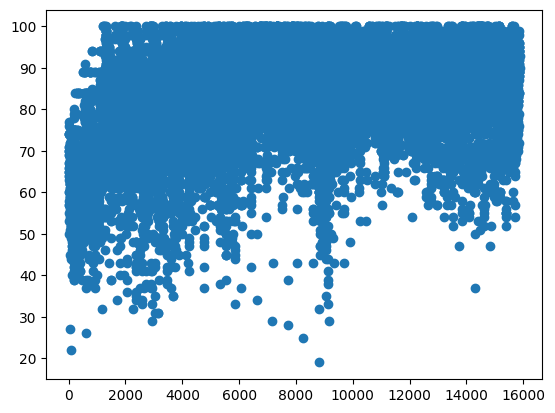

In [15]:
plt.scatter(df.index, df['humidity'])
plt.show()

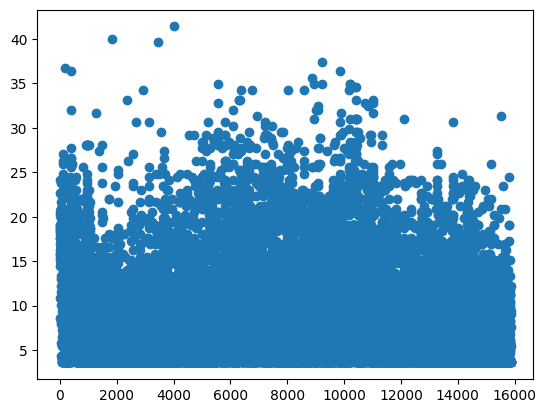

In [16]:
plt.scatter(df.index, df['wind_kph'])
plt.show()

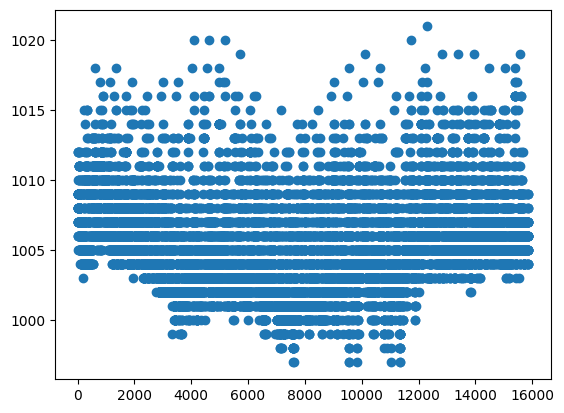

In [17]:
plt.scatter(df.index, df['pressure_mb'])
plt.show()

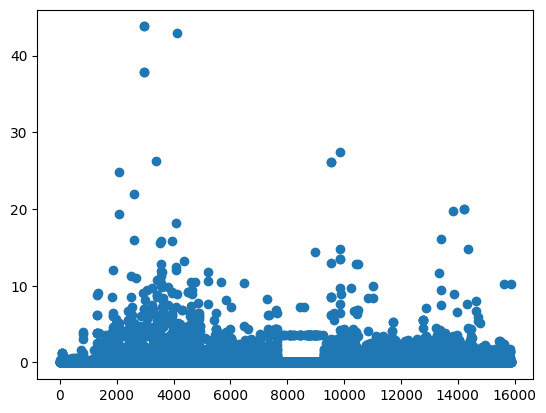

In [18]:
plt.scatter(df.index, df['precip_mm'])
plt.show()

###Density Plots

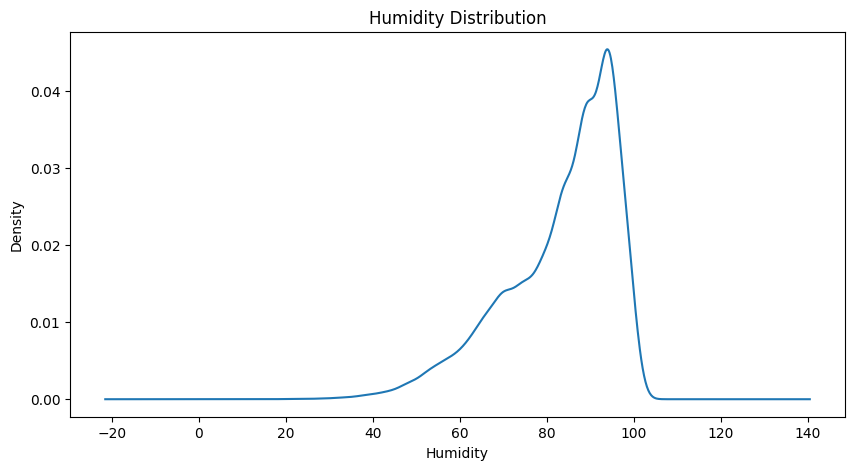

In [19]:
plt.figure(figsize=(10,5))
df['humidity'].plot(kind='density')
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.show()

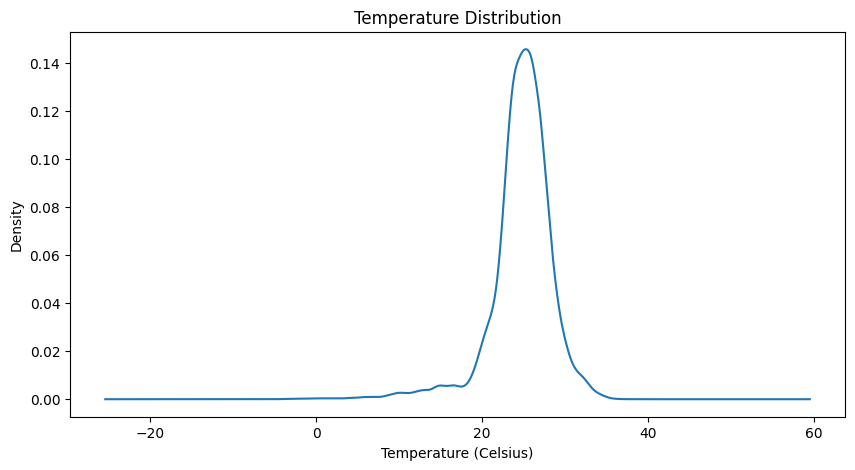

In [20]:
plt.figure(figsize=(10,5))
df['temperature_celsius'].plot(kind='density')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Density')
plt.show()

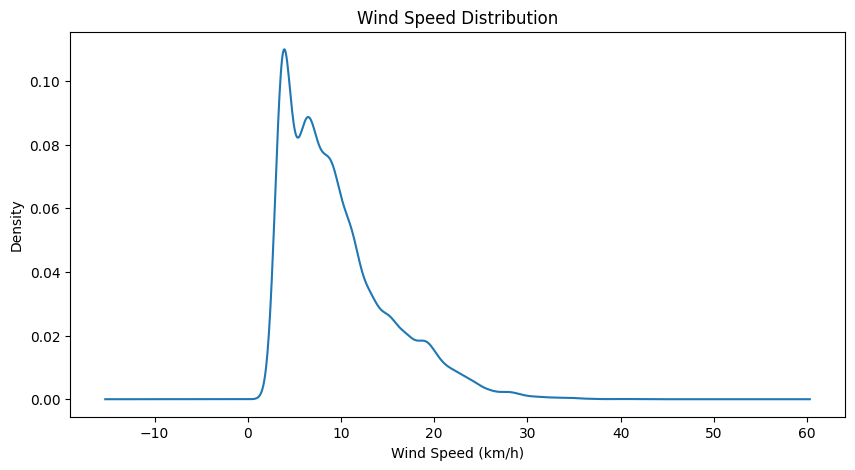

In [21]:
plt.figure(figsize=(10,5))
df['wind_kph'].plot(kind='density')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Density')
plt.show()

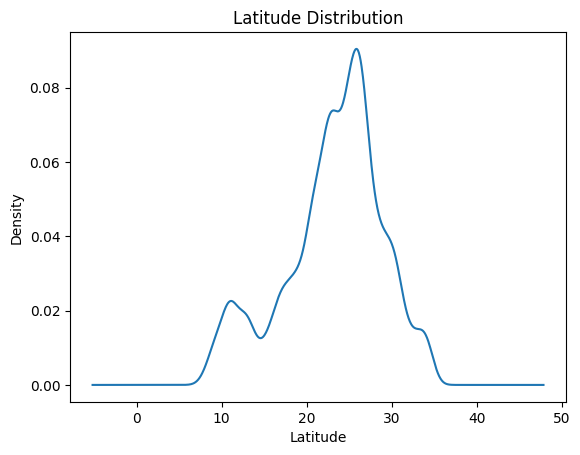

In [22]:
df['latitude'].plot(kind='density')
plt.title('Latitude Distribution')
plt.xlabel('Latitude')
plt.ylabel('Density')
plt.show()

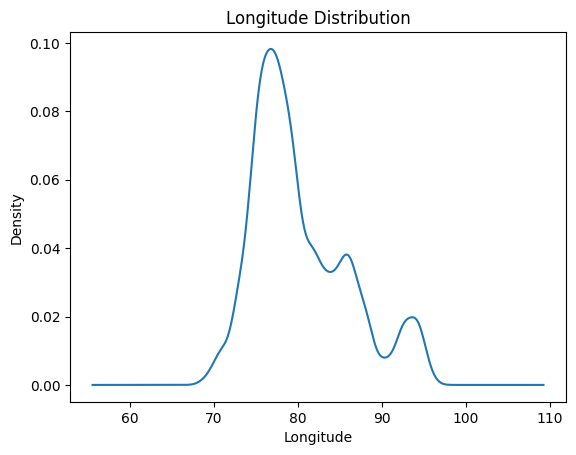

In [23]:
df['longitude'].plot(kind='density')
plt.title('Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Density')
plt.show()

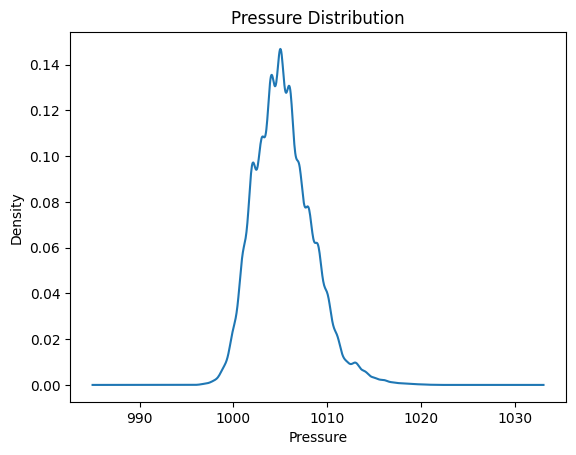

In [24]:
# df['pressure_in'].plot(kind='density')
df['pressure_mb'].plot(kind='density')
plt.title('Pressure Distribution')
plt.xlabel('Pressure')
plt.ylabel('Density')
plt.show()

Text(0.5, 0, 'Precipitation')

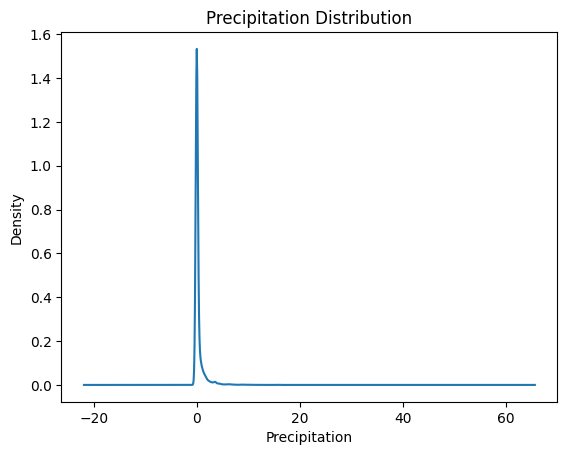

In [25]:
df['precip_mm'].plot(kind='density')
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation')

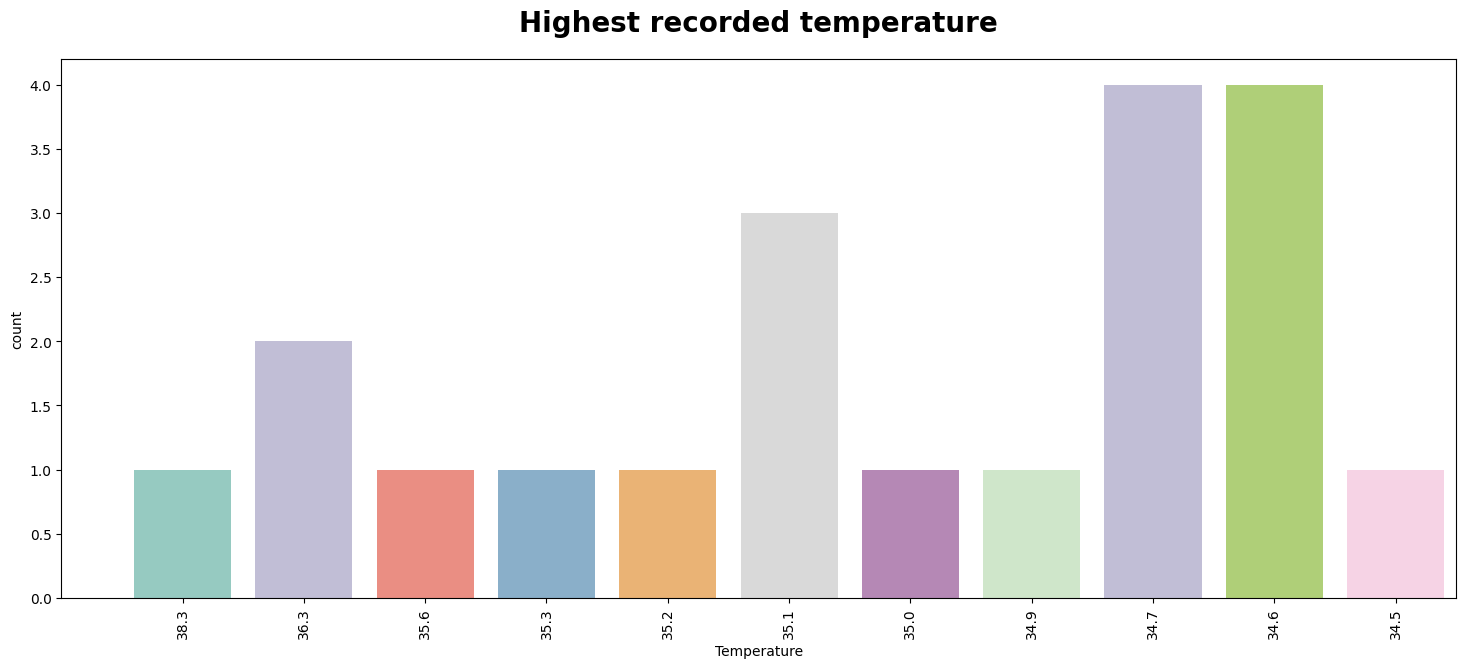

In [26]:
top_10_temp = df.temperature_celsius.sort_values(ascending=False).head(20)

plt.subplots(figsize=(18,7))
sns.countplot(x='temperature_celsius', data=df,palette="Set3", order = top_10_temp)
plt.title('Highest recorded temperature', weight='bold',fontsize=20,pad=20)
plt.ylabel('count')
plt.xlabel('Temperature')
plt.xticks(rotation=90)
plt.xlim(-1,10.5)
plt.show()

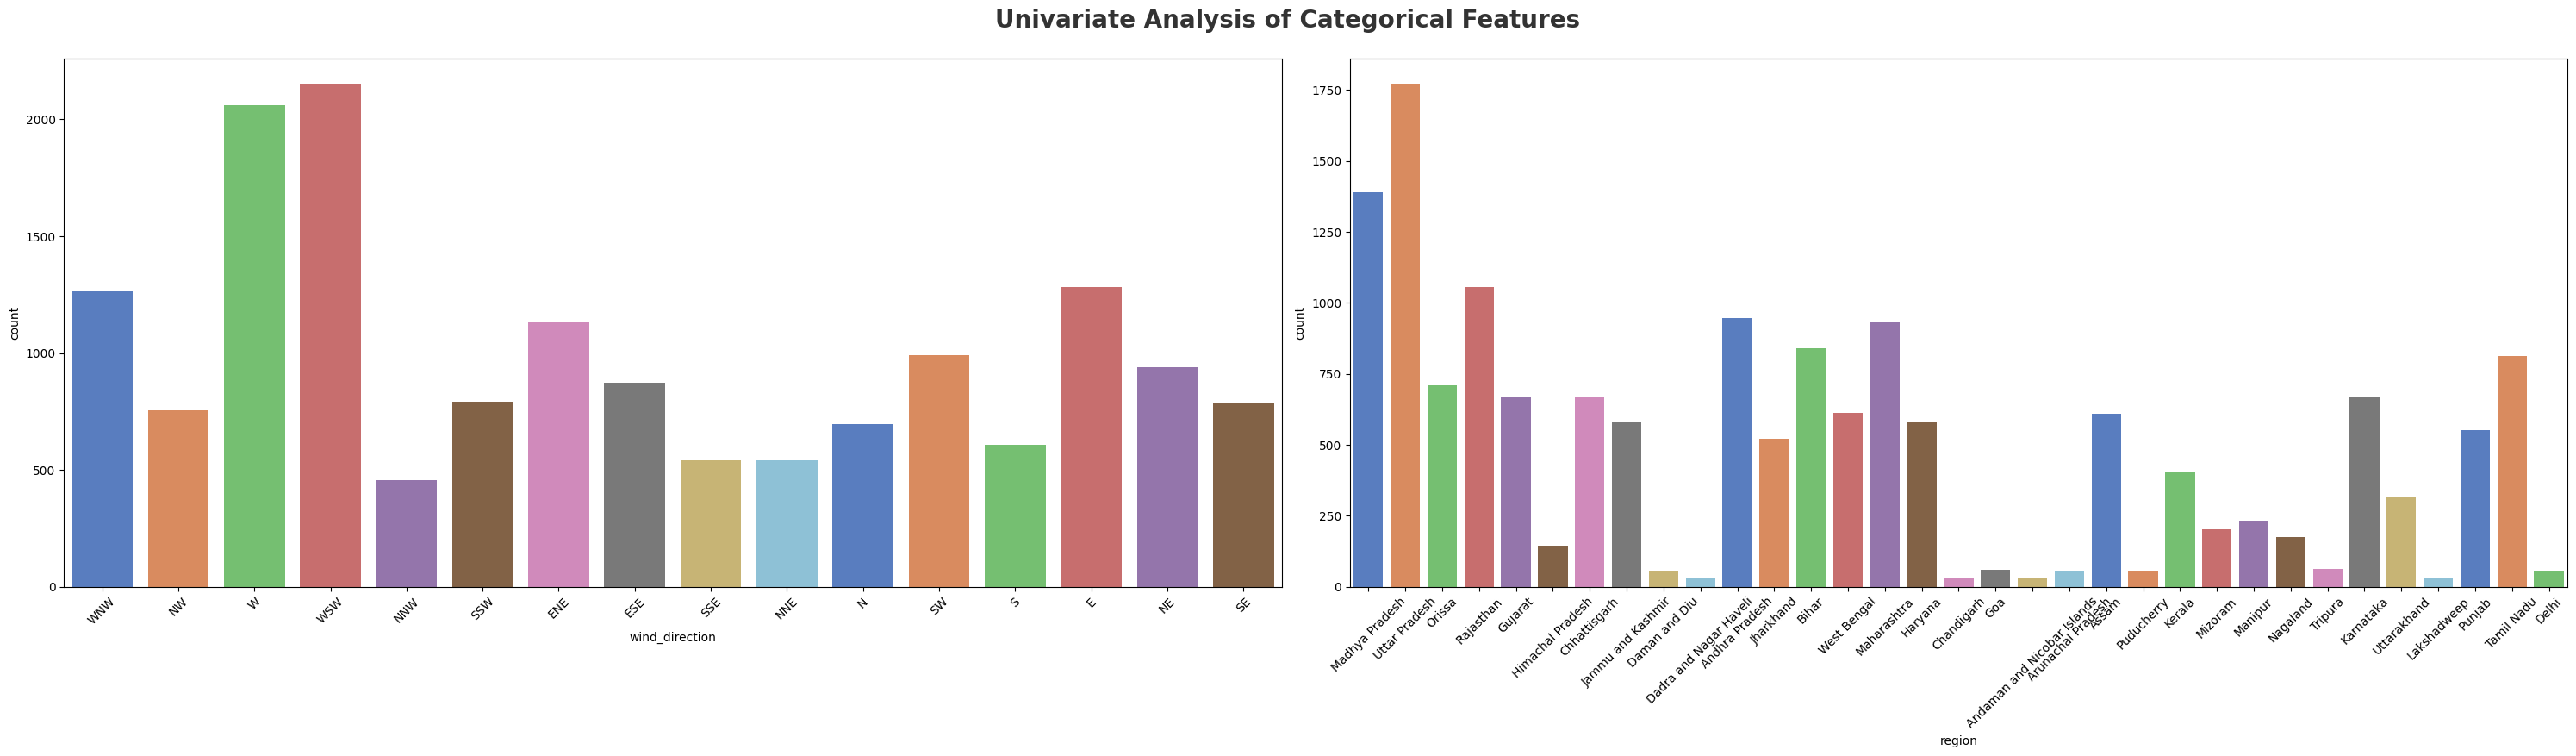

In [27]:
plt.figure(figsize=(30,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20,fontweight='bold', alpha=0.8, y=1.0)
cat1 = [ 'wind_direction', 'region']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]], palette= 'muted')
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

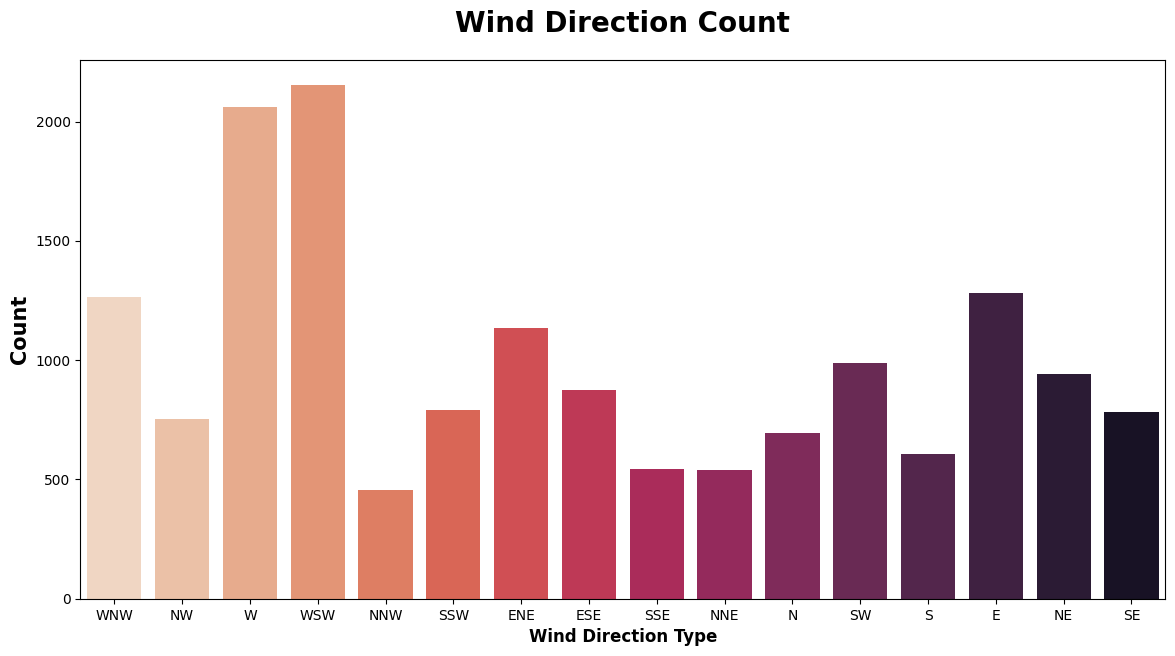

In [28]:
plt.subplots(figsize=(14,7))
sns.countplot(x='wind_direction', data=df,palette="rocket_r")
plt.title("Wind Direction Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Wind Direction Type", weight="bold", fontsize=12)
plt.show()

In [29]:
ml_data = df[['latitude','longitude','humidity','wind_direction','wind_kph','pressure_mb','precip_mm','temperature_celsius']]
ml_data

,latitude,longitude,humidity,wind_direction,wind_kph,pressure_mb,precip_mm,temperature_celsius
0,24.57,77.72,67,WNW,20.5,1008,0.00,27.5
1,23.33,77.80,70,WNW,15.5,1008,0.00,27.5
2,22.07,78.93,70,NW,18.4,1009,0.00,26.3
3,21.86,77.93,76,WNW,16.9,1009,0.00,25.6
4,22.75,77.72,74,W,16.2,1009,0.00,27.2
...,...,...,...,...,...,...,...,...
15863,28.88,77.53,84,N,3.6,1007,0.00,27.0
15864,23.97,92.58,99,ESE,3.6,1008,0.00,21.3
15865,12.93,79.33,79,NW,9.4,1006,0.16,25.6
15866,8.97,77.30,90,W,12.2,1008,0.00,22.1


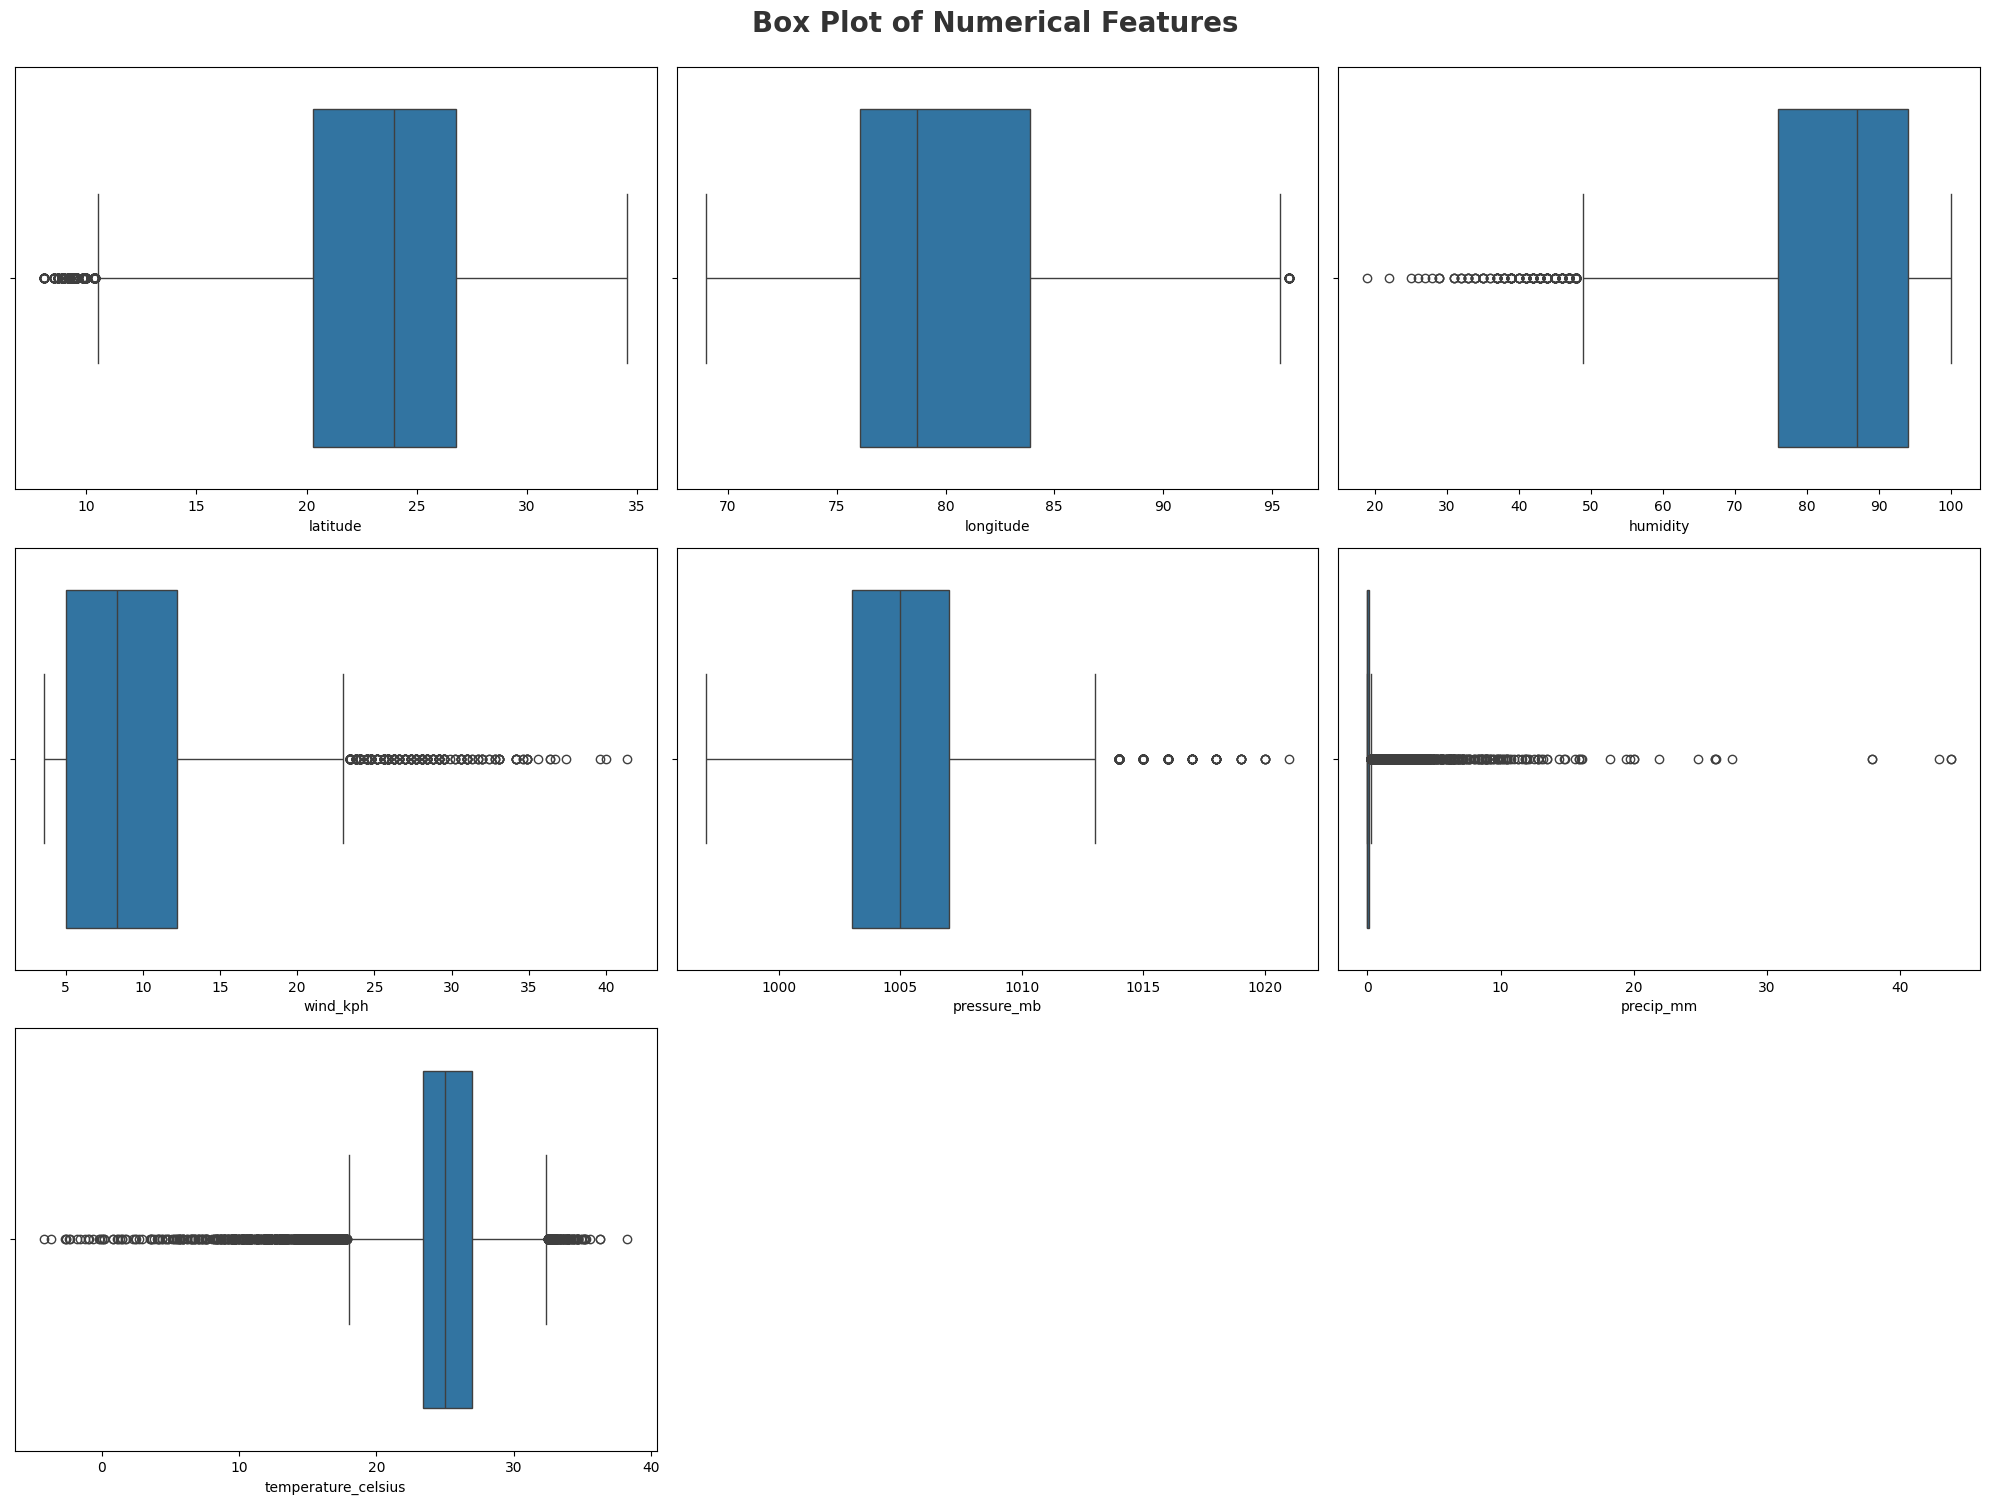

In [30]:
num_df_filtered = ml_data.drop(columns=['wind_direction'])

plt.figure(figsize=(20, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(num_df_filtered.columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[num_df_filtered.columns[i]])
    plt.xlabel(num_df_filtered.columns[i])
    plt.tight_layout()

plt.show()

Bivariate Analysis

In [31]:
fig4=px.bar(df.groupby('region')['temperature_celsius'].mean().reset_index(), x='region', y='temperature_celsius', title='Average temperature exposure by State')
fig4.show()

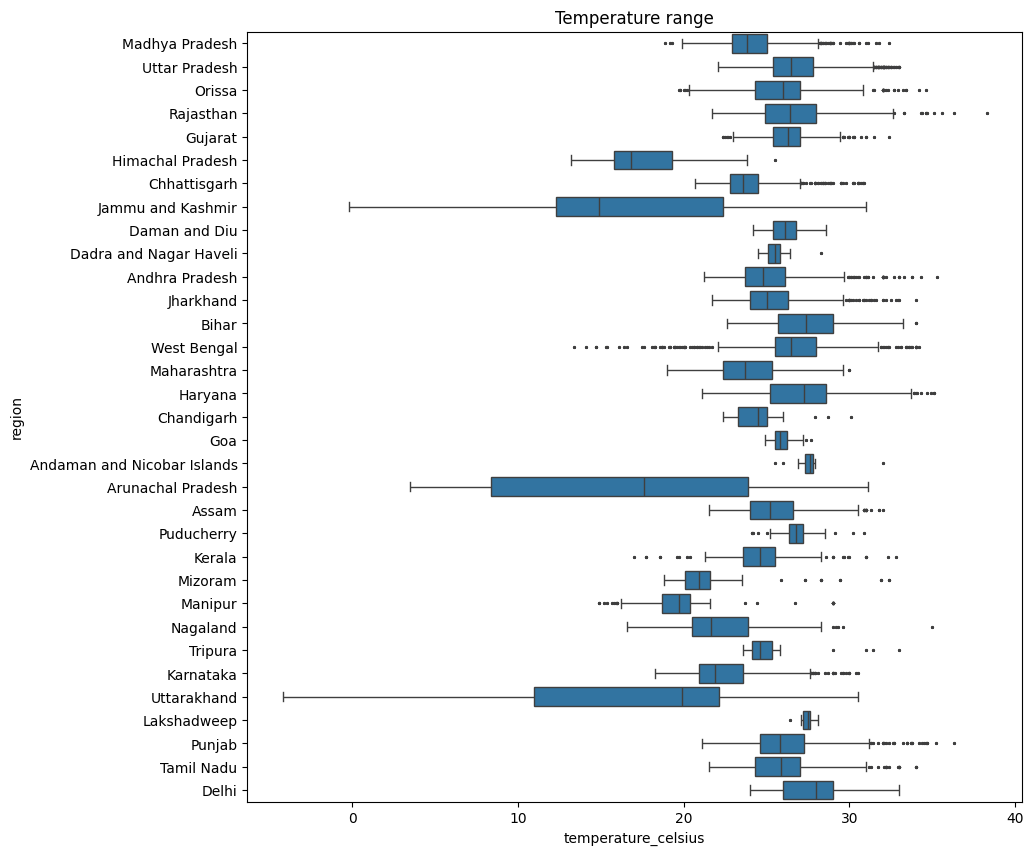

In [32]:
plt.figure(figsize=(10, 10))
temp_range=sns.boxplot(data=df, y='region', x='temperature_celsius',
                       flierprops={'marker': '*', 'markersize': 2, 'markerfacecolor': 'blue'})
temp_range.set_title("Temperature range")

plt.show()

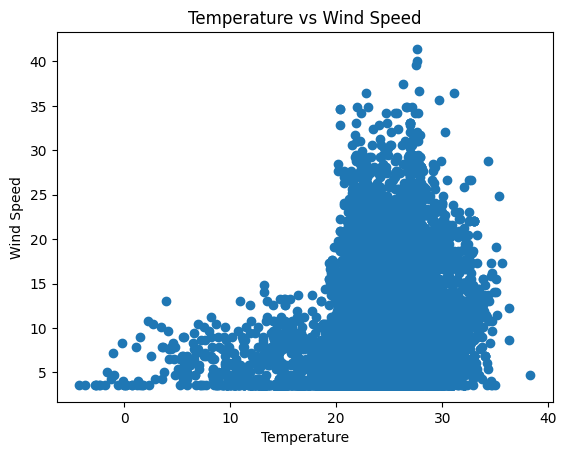

In [33]:
plt.scatter(df['temperature_celsius'], df['wind_kph'])
plt.title('Temperature vs Wind Speed')
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')
plt.show()

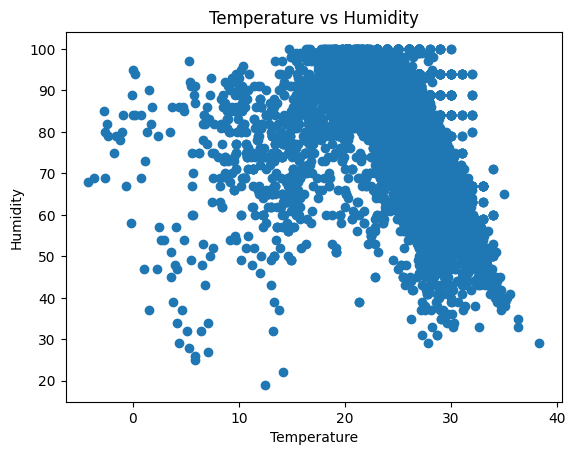

In [34]:
plt.scatter(df['temperature_celsius'], df['humidity'])
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

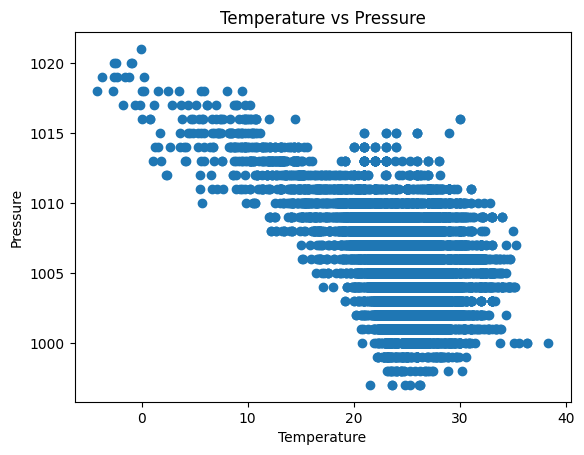

In [35]:
plt.scatter(df['temperature_celsius'], df['pressure_mb'])
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

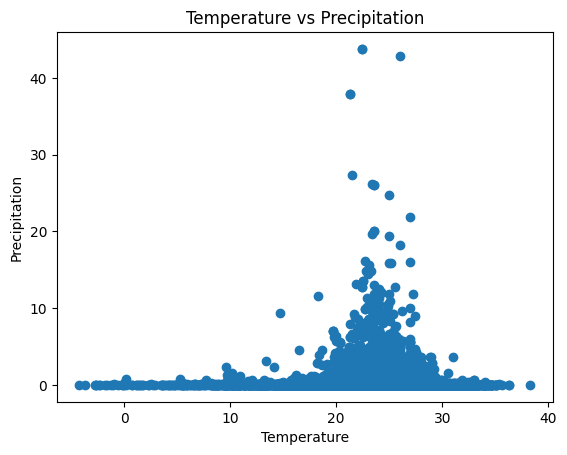

In [36]:
plt.scatter(df['temperature_celsius'], df['precip_mm'])
plt.title('Temperature vs Precipitation')
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.show()

In [37]:
temp = df.groupby('region').temperature_celsius.max()
temp = temp.to_frame().sort_values('temperature_celsius',ascending=False)[0:10]
print('Top 10 regions with highest temperature')
temp

Top 10 regions with highest temperature


,temperature_celsius
region,
Rajasthan,38.3
Punjab,36.3
Andhra Pradesh,35.3
Haryana,35.1
Nagaland,35.0
Orissa,34.6
West Bengal,34.2
Tamil Nadu,34.0
Bihar,34.0


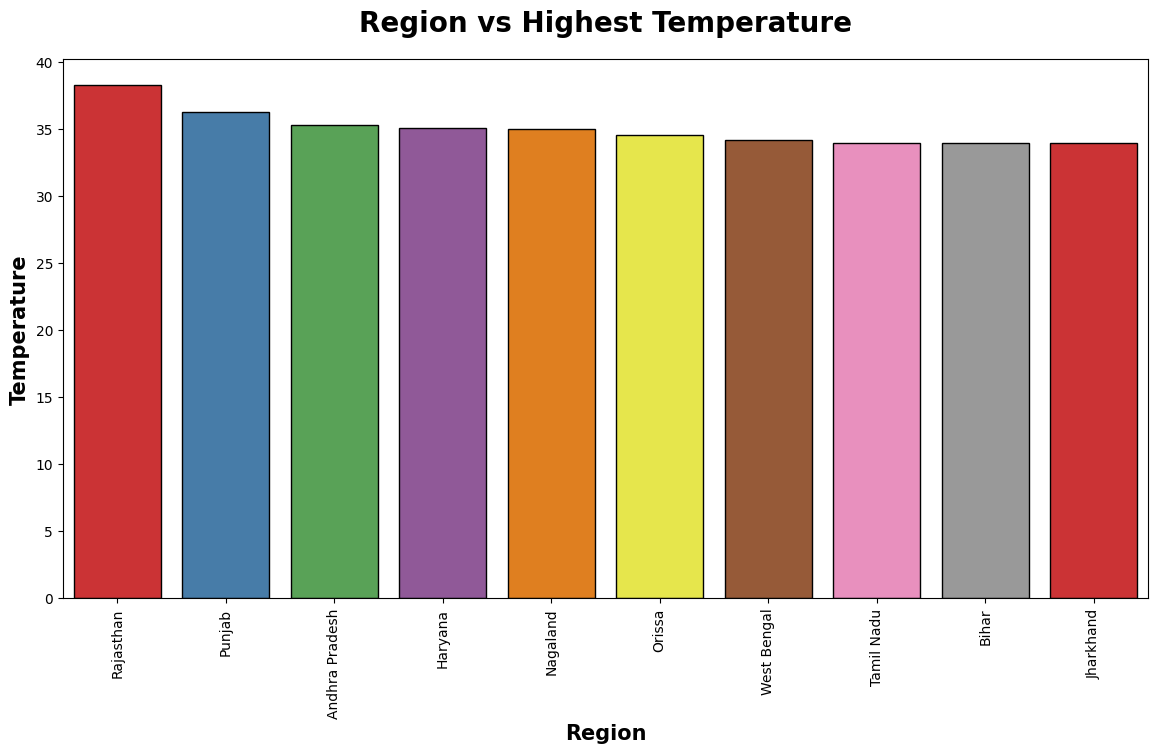

In [38]:
plt.subplots(figsize=(14,7))
sns.barplot(x=temp.index, y =temp.temperature_celsius, ec='black',palette='Set1')
plt.title('Region vs Highest Temperature',weight='bold',fontsize=20,pad=20)
plt.xlabel('Region',weight='bold',fontsize=15)
plt.ylabel('Temperature', weight='bold', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Top 10 regions with highest pressure


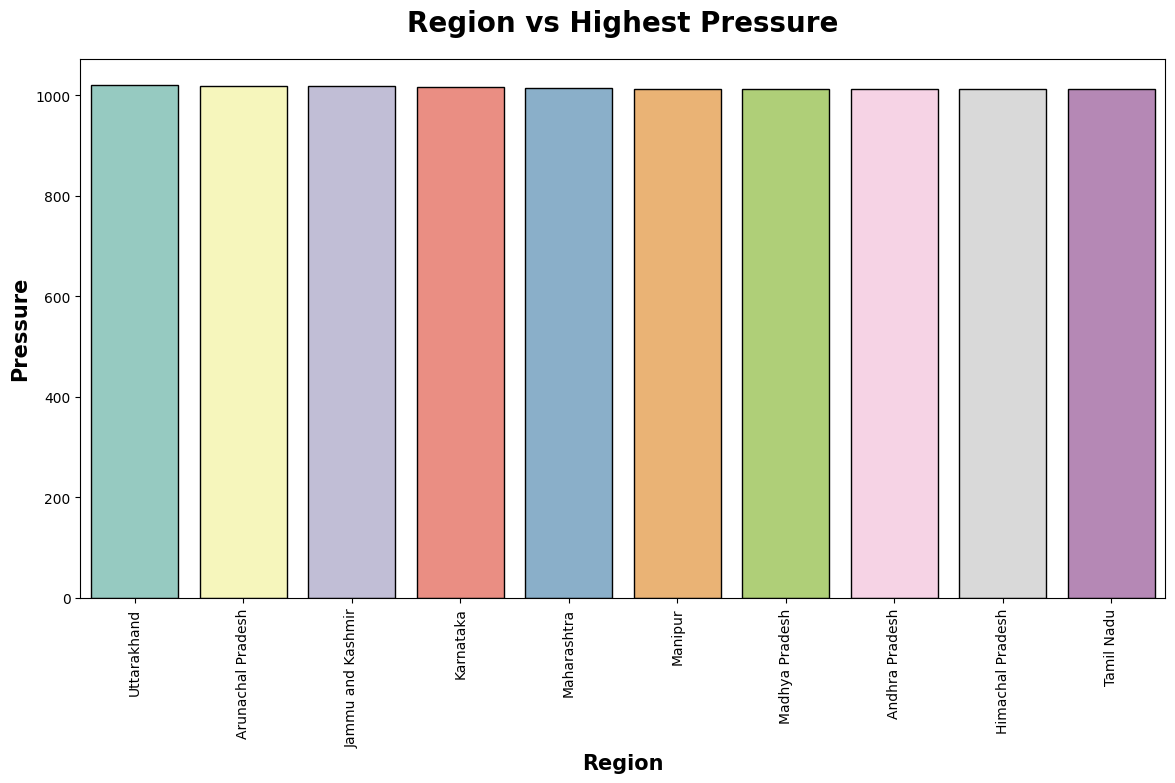

In [39]:
pressure = df.groupby('region').pressure_mb.max()
pressure = pressure.to_frame().sort_values('pressure_mb',ascending=False)[0:10]
print('Top 10 regions with highest pressure')
pressure
plt.subplots(figsize=(14,7))
sns.barplot(x=pressure.index, y =pressure.pressure_mb, ec='black',palette='Set3')
plt.title('Region vs Highest Pressure',weight='bold',fontsize=20,pad=20)
plt.xlabel('Region',weight='bold',fontsize=15)
plt.ylabel('Pressure', weight='bold', fontsize=15)
plt.xticks(rotation=90)
plt.show()

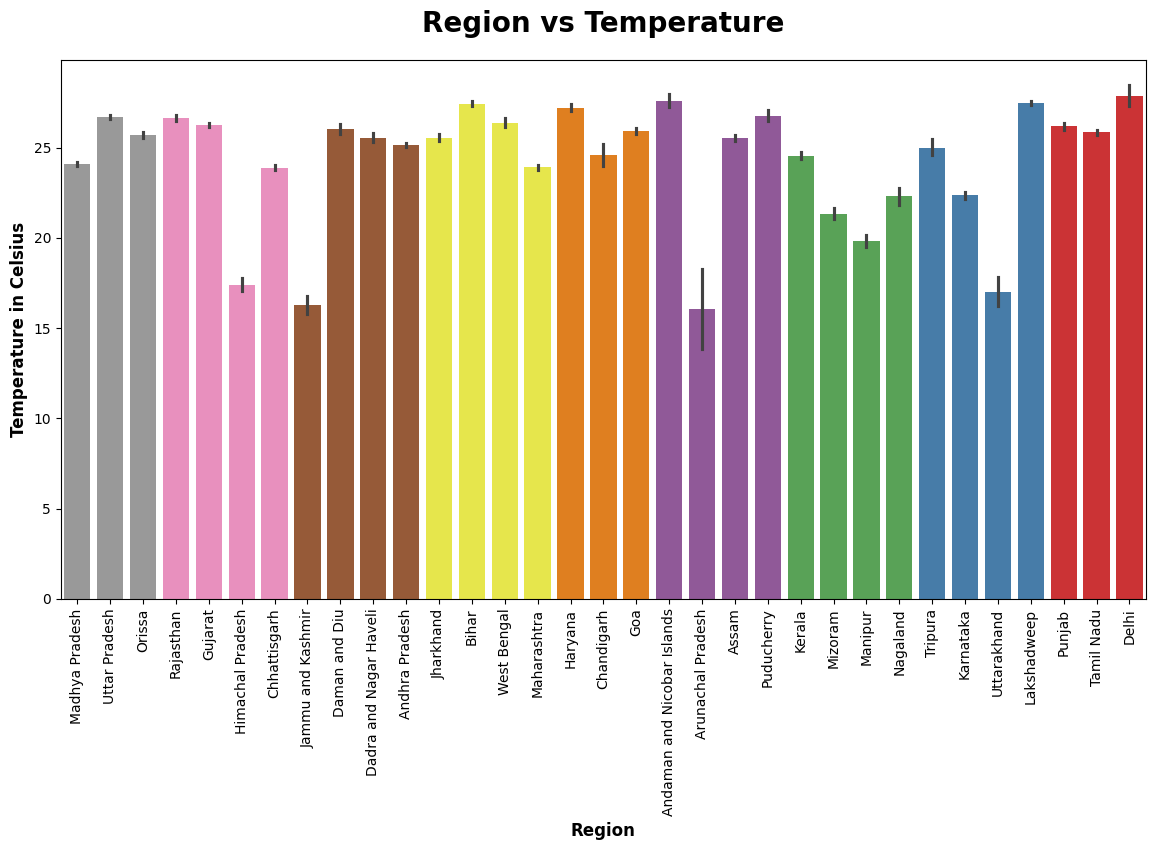

In [40]:
plt.subplots(figsize=(14,7))
sns.barplot(x='region',y='temperature_celsius',data=df,palette='Set1_r')
plt.title("Region vs Temperature",weight='bold',fontsize=20,pad=20)
plt.ylabel('Temperature in Celsius',weight='bold',fontsize=12)
plt.xlabel('Region',weight='bold',fontsize=12)
plt.xticks(rotation=90)
plt.show()

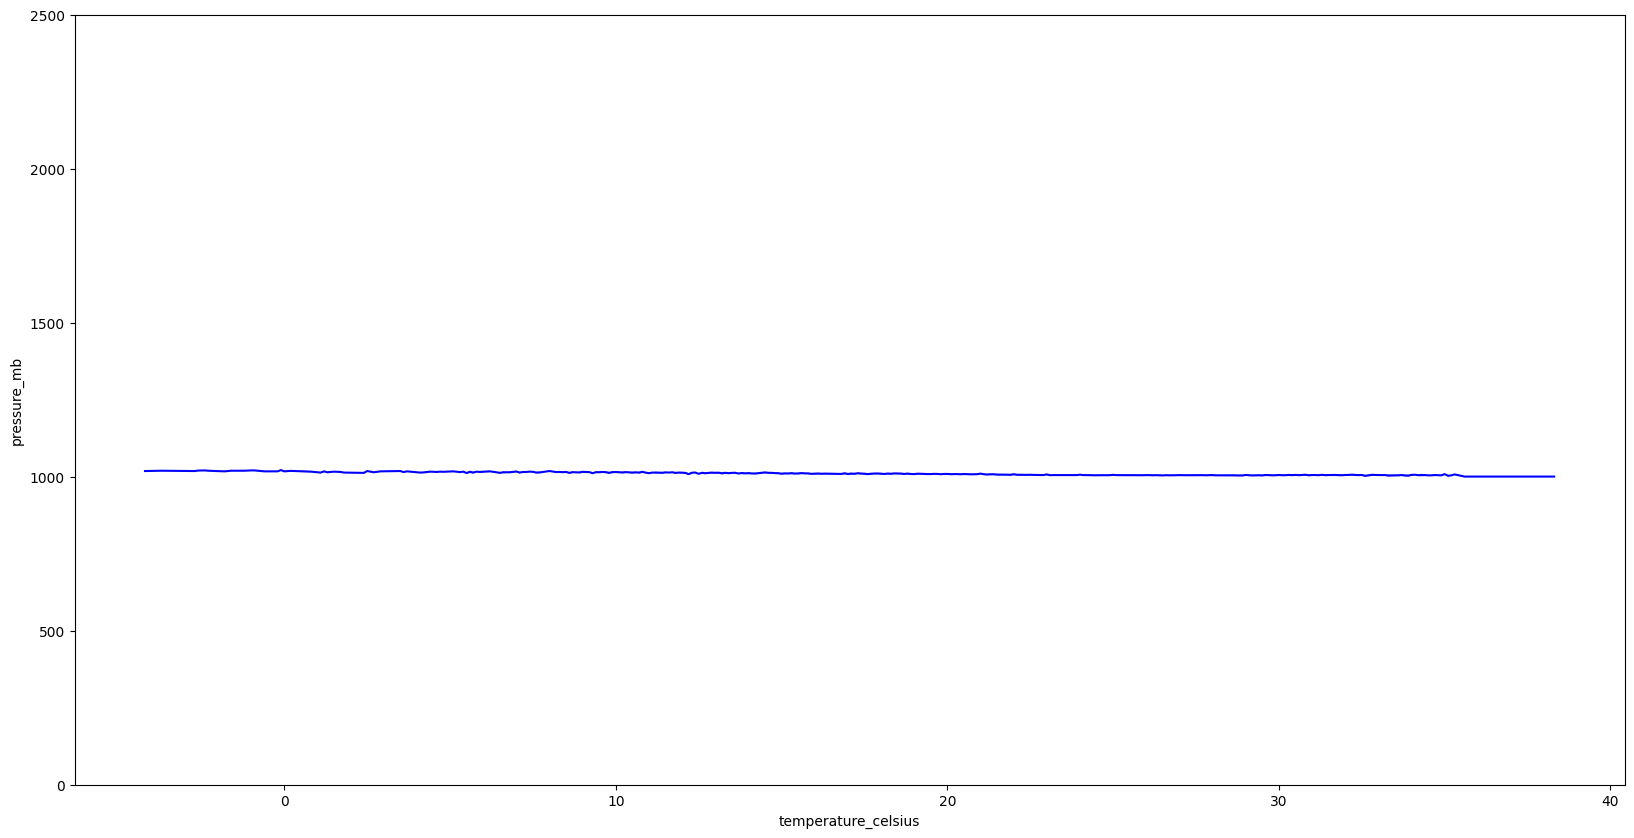

In [41]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='temperature_celsius',y='pressure_mb',data=df,color='b')
plt.ylim(0,2500)
plt.show()

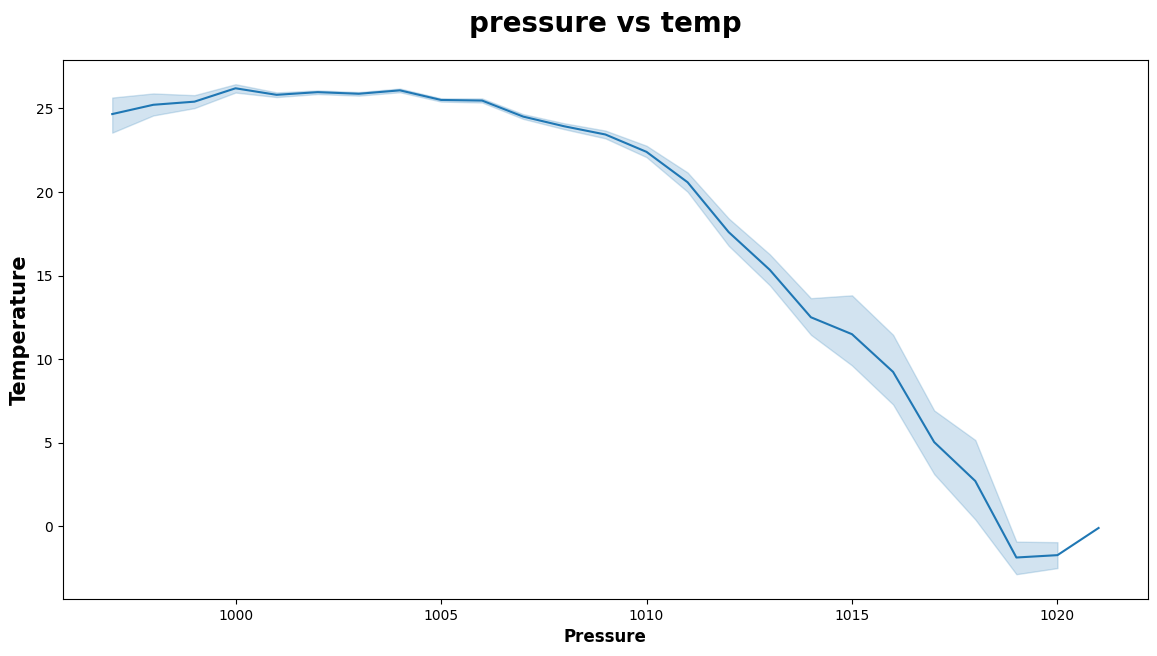

In [42]:
plt.subplots(figsize=(14,7))
sns.lineplot(x='pressure_mb',y='temperature_celsius', data=df,palette="rocket_r")
plt.title("pressure vs temp", weight="bold",fontsize=20, pad=20)
plt.ylabel("Temperature", weight="bold", fontsize=15)
plt.xlabel("Pressure", weight="bold", fontsize=12)
plt.show()

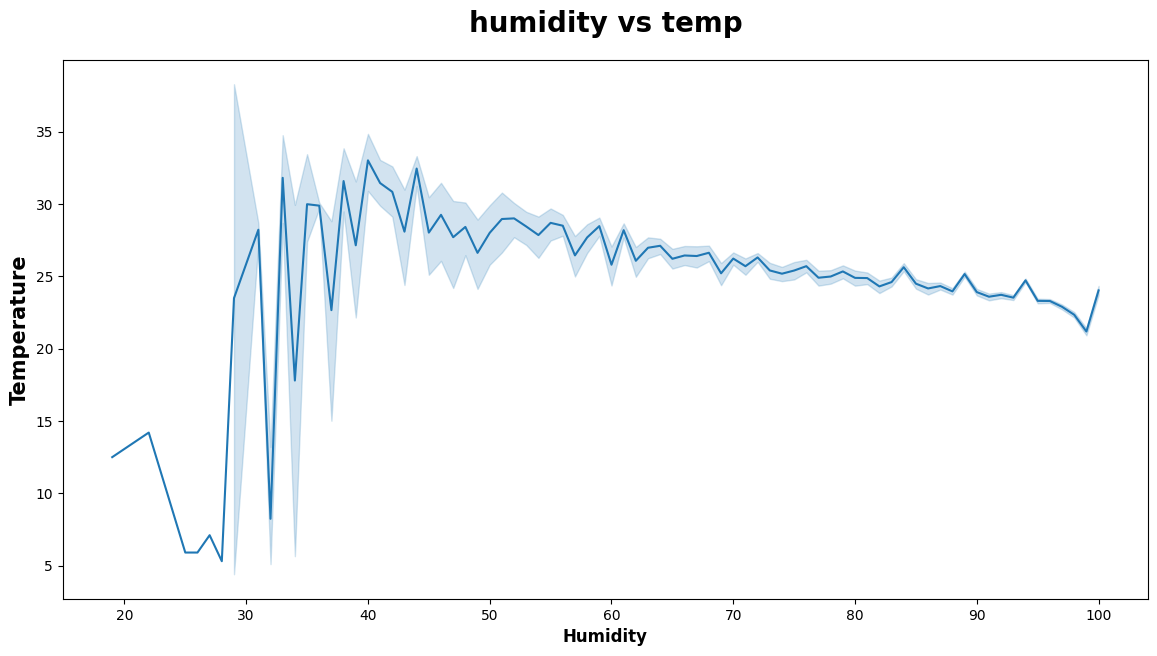

In [43]:
plt.subplots(figsize=(14,7))
sns.lineplot(x='humidity',y='temperature_celsius', data=df,palette="rocket_r")
plt.title("humidity vs temp", weight="bold",fontsize=20, pad=20)
plt.ylabel("Temperature", weight="bold", fontsize=15)
plt.xlabel("Humidity", weight="bold", fontsize=12)
plt.show()

###Multivariate Analysis

In [44]:
corr_matrix = numerical.corr()
corr_matrix

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_in,humidity,cloud,feels_like_celsius,visibility_km,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10
temperature_celsius,1.000000,0.144552,0.114694,-0.503835,-0.038590,-0.326521,-0.142540,0.977370,0.024245,0.185725,0.071228,0.155064,0.120618,0.219152,0.247018
wind_kph,0.144552,1.000000,0.241650,-0.075277,0.043192,-0.100906,0.067729,0.126581,0.173161,-0.222731,0.165468,-0.146842,-0.009228,-0.234460,-0.217457
wind_degree,0.114694,0.241650,1.000000,0.127319,-0.021023,-0.201986,-0.077789,0.069722,0.111713,-0.313365,0.108796,-0.242948,-0.079355,-0.232568,-0.205551
pressure_mb,-0.503835,-0.075277,0.127319,1.000000,-0.053454,-0.084966,-0.067974,-0.531148,-0.054652,-0.239671,0.048675,-0.193081,-0.136050,-0.224937,-0.211183
precip_in,-0.038590,0.043192,-0.021023,-0.053454,1.000000,0.178589,0.243409,-0.020464,-0.106783,-0.034243,-0.053995,-0.032193,0.003681,-0.067476,-0.081670
humidity,-0.326521,-0.100906,-0.201986,-0.084966,0.178589,1.000000,0.603053,-0.231695,-0.394115,-0.029169,-0.378112,-0.001825,0.041736,-0.132012,-0.208477
cloud,-0.142540,0.067729,-0.077789,-0.067974,0.243409,0.603053,1.000000,-0.087940,-0.329982,-0.113083,-0.202262,-0.056090,0.042258,-0.212493,-0.269531
feels_like_celsius,0.977370,0.126581,0.069722,-0.531148,-0.020464,-0.231695,-0.087940,1.000000,-0.004111,0.206420,0.055240,0.184279,0.142946,0.222936,0.238080
visibility_km,0.024245,0.173161,0.111713,-0.054652,-0.106783,-0.394115,-0.329982,-0.004111,1.000000,-0.057779,0.149322,-0.104526,-0.106002,-0.002357,0.008990
air_quality_Carbon_Monoxide,0.185725,-0.222731,-0.313365,-0.239671,-0.034243,-0.029169,-0.113083,0.206420,-0.057779,1.000000,-0.196636,0.691584,0.402964,0.867269,0.861359


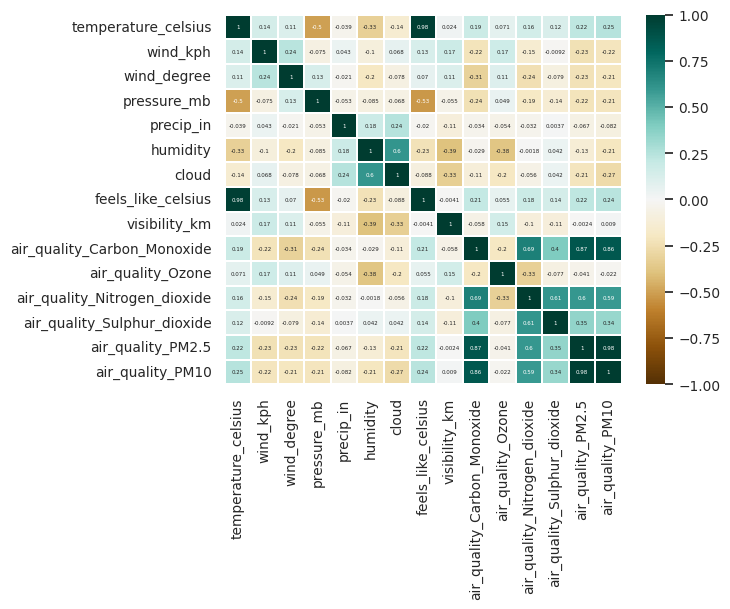

<Figure size 1400x1400 with 0 Axes>

In [45]:
sns.set(font_scale=0.9)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="BrBG", annot_kws={"fontsize":4},linewidths=0.1)
plt.figure(figsize=(14,14))
plt.show()

#PREPROCESSING

In [46]:
df.isnull().sum()

,0
country,0
location_name,0
region,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0


In [47]:
df.duplicated().sum()

0

###Encoding

In [48]:
encoder = OneHotEncoder(sparse_output=False, drop=None)

In [49]:
encoded = encoder.fit_transform(df[['wind_direction']])

In [50]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['wind_direction']))

In [51]:
df_encoded = pd.concat([ml_data, encoded_df], axis=1)

In [52]:
ml_data=df_encoded
ml_data

,latitude,longitude,humidity,wind_direction,wind_kph,pressure_mb,precip_mm,temperature_celsius,wind_direction_E,wind_direction_ENE,...,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_W,wind_direction_WNW,wind_direction_WSW
0,24.57,77.72,67,WNW,20.5,1008,0.00,27.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,23.33,77.80,70,WNW,15.5,1008,0.00,27.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,22.07,78.93,70,NW,18.4,1009,0.00,26.3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.86,77.93,76,WNW,16.9,1009,0.00,25.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22.75,77.72,74,W,16.2,1009,0.00,27.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15863,28.88,77.53,84,N,3.6,1007,0.00,27.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15864,23.97,92.58,99,ESE,3.6,1008,0.00,21.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15865,12.93,79.33,79,NW,9.4,1006,0.16,25.6,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15866,8.97,77.30,90,W,12.2,1008,0.00,22.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


###Scaling

In [53]:
std = StandardScaler()
minmax = MinMaxScaler()

In [54]:
ml_data[['latitude', 'longitude']] = std.fit_transform(ml_data[['latitude', 'longitude']])

In [55]:
ml_data['pressure_mb'	] = std.fit_transform(ml_data[['pressure_mb']])

In [56]:
ml_data['humidity']= minmax.fit_transform(ml_data[['humidity']])

In [57]:
ml_data['wind_kph']= minmax.fit_transform(ml_data[['wind_kph']])

In [58]:
ml_data['precip_mm']= minmax.fit_transform(ml_data[['precip_mm']])

In [59]:
ml_data=ml_data.drop(['wind_direction'], axis=1)
ml_data

,latitude,longitude,humidity,wind_kph,pressure_mb,precip_mm,temperature_celsius,wind_direction_E,wind_direction_ENE,wind_direction_ESE,...,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_W,wind_direction_WNW,wind_direction_WSW
0,0.253331,-0.437124,0.592593,0.447090,0.866290,0.000000,27.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.039373,-0.423231,0.629630,0.314815,0.866290,0.000000,27.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.178037,-0.226989,0.629630,0.391534,1.192557,0.000000,26.3,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.214272,-0.400654,0.703704,0.351852,1.192557,0.000000,25.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.060705,-0.437124,0.679012,0.333333,1.192557,0.000000,27.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15863,0.997010,-0.470121,0.802469,0.000000,0.540023,0.000000,27.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15864,0.149803,2.143544,0.987654,0.000000,0.866290,0.000000,21.3,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15865,-1.755118,-0.157523,0.740741,0.153439,0.213756,0.003653,25.6,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15866,-2.438405,-0.510064,0.876543,0.227513,0.866290,0.000000,22.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
ml_data.to_csv('C:\\Users\\Gouri\\Downloads\\preprocessed_data.csv')

###Calculation of Variation Inflation Factor

In [61]:
def calculate_vif(ml_data):

    # Ensure only numeric columns are included
    numeric_data = ml_data.select_dtypes(include=['number'])

    # Check for missing values
    if numeric_data.isnull().any().any():
        raise ValueError("The dataset contains missing values. Please handle them before calculating VIF.")

    # Add a constant column for the intercept term
    data_with_const = add_constant(numeric_data)

    # Calculate VIF for each numeric feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_data.columns
    vif_data["VIF"] = [
        variance_inflation_factor(data_with_const.values, i + 1)  # Skip the constant column
        for i in range(numeric_data.shape[1])
    ]

    return vif_data.sort_values(by="VIF", ascending=False)


X = ml_data.drop(columns=["temperature_celsius"], errors='ignore')
try:
    vif_result = calculate_vif(X)
    print(vif_result)
except ValueError as e:
    print("Error:", e)


               Feature       VIF
11  wind_direction_NNE       inf
12  wind_direction_NNW       inf
20  wind_direction_WNW       inf
19    wind_direction_W       inf
18   wind_direction_SW       inf
17  wind_direction_SSW       inf
16  wind_direction_SSE       inf
15   wind_direction_SE       inf
14    wind_direction_S       inf
13   wind_direction_NW       inf
21  wind_direction_WSW       inf
10   wind_direction_NE       inf
9     wind_direction_N       inf
8   wind_direction_ESE       inf
7   wind_direction_ENE       inf
6     wind_direction_E       inf
0             latitude  1.645826
3             wind_kph  1.371978
2             humidity  1.349613
1            longitude  1.300840
4          pressure_mb  1.155021
5            precip_mm  1.045613


VIF being below 5 indicates that there is no mutli-collinearity between features.

# Splitting dataset into test and train

In [62]:
x = ml_data.drop(['temperature_celsius'], axis=1)
y = ml_data[['temperature_celsius']]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
x_test

,latitude,longitude,humidity,wind_kph,pressure_mb,precip_mm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_N,...,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_W,wind_direction_WNW,wind_direction_WSW
2360,1.014264,-0.558690,0.358025,0.171958,-0.438779,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11478,-2.438405,-0.510064,0.876543,0.208995,1.192557,0.000228,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5297,-0.419603,0.931360,1.000000,0.066138,-1.091313,0.002283,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10909,-0.880304,-0.114106,0.802469,0.113757,0.213756,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4069,0.746816,0.337424,0.827160,0.105820,-1.091313,0.034247,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7735,0.600151,0.089082,1.000000,0.084656,-1.743847,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10801,0.651915,-0.678519,0.925926,0.410053,-1.091313,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5479,-0.065881,-0.765352,0.975309,0.380952,-1.417580,0.006849,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9814,-1.026969,-0.107160,0.814815,0.219577,-0.438779,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
y_train

,temperature_celsius
944,32.5
2168,24.9
5814,23.1
4540,29.0
2333,28.5
...,...
13418,25.4
5390,24.7
860,34.7
15795,25.0


In [66]:
print("Shape of train dataset (input) is:",x_train.shape)
print("Shape of test dataset (input) is:", x_test.shape)
print("Shape of train dataset (output) is:", y_train.shape)
print("Shape of test dataset (output) is:", y_test.shape)

Shape of train dataset (input) is: (12694, 22)
Shape of test dataset (input) is: (3174, 22)
Shape of train dataset (output) is: (12694, 1)
Shape of test dataset (output) is: (3174, 1)


## Setting baseline error

In [67]:
y_pred = [y_train.mean()] * len(y_train)
print('Baseline MAE:', round(mean_absolute_error(y_train, y_pred), 5))

Baseline MAE: 2.54677


#Linear Regression

In [68]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

y_pred_lr=linreg.predict(x_test)

model_accuracy=r2_score(y_test,y_pred_lr)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 52.57


In [69]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_score_lr = r2_score(y_test, y_pred_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared Score:", r2_score_lr)
print(f"Mean Absolute Error: {mae_lr}")

Mean Squared Error: 7.276330972281657
R-squared Score: 0.5256603507286552
Mean Absolute Error: 1.952605027230805


#SGD Regressor

In [70]:
reg=SGDRegressor(max_iter=1000, tol=1e-3)

reg.fit(x_train,y_train)

y_pred=reg.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 52.62


In [71]:
mae_sgd = mean_absolute_error(y_test, y_pred)
mse_sgd = mean_squared_error(y_test, y_pred)
r2_score_sgd = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_sgd)
print("R-squared Score:", r2_score_sgd)
print(f"Mean Absolute Error: {mae_sgd}")

Mean Squared Error: 7.268531173503834
R-squared Score: 0.5261688149300163
Mean Absolute Error: 1.9569744549030996


#Lasso Regressor

In [72]:
lasso = Lasso()
lasso.fit(x_train, y_train)

y_pred_ls=lasso.predict(x_test)

model_accuracy=r2_score(y_test,y_pred_ls)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 18.00


In [73]:
mae_lasso = mean_absolute_error(y_test, y_pred_ls)
mse_lasso = mean_squared_error(y_test, y_pred_ls)
r2_score_lasso = r2_score(y_test, y_pred_ls)
print("Mean Squared Error:", mse_lasso)
print("R-squared Score:", r2_score_lasso)
print(f"Mean Absolute Error: {mae_lasso}")

Mean Squared Error: 12.578770079732509
R-squared Score: 0.17999752751567877
Mean Absolute Error: 2.442253871509323


# Decision Tree Regressor

In [74]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

y_pred_dtr=regressor.predict(x_test)

model_accuracy=r2_score(y_test,y_pred_dtr)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 89.72


In [75]:
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse = mean_squared_error(y_test, y_pred_dtr)
r2_score_dtr = r2_score(y_test, y_pred_dtr)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2_score_dtr)
print(f"Mean Absolute Error: {mae_dtr}")

Mean Squared Error: 1.576204316320101
R-squared Score: 0.8972481865611437
Mean Absolute Error: 0.7042690611216132


#Random Forest Regressor

In [76]:
forestmodel =RandomForestRegressor(
                                   n_estimators=100,
                                   max_depth=50,
                                   random_state=77,
                                   n_jobs=-1)


forestmodel.fit(x_train, y_train)

y_predrf = forestmodel.predict(x_test)

model_accuracy=r2_score(y_test,y_predrf)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 93.77


In [77]:
mae_rf=mean_absolute_error(y_test, y_predrf)
mse_rf = mean_squared_error(y_test, y_predrf)
r2_score_rf = r2_score(y_test, y_predrf)
print("Mean Squared Error:", mse_rf)
print("R-squared Score:", r2_score_rf)
print(f"Mean Absolute Error: {mae_rf}")

Mean Squared Error: 0.9553820344554826
R-squared Score: 0.9377192185360895
Mean Absolute Error: 0.6049644372430767


#Feature Importance

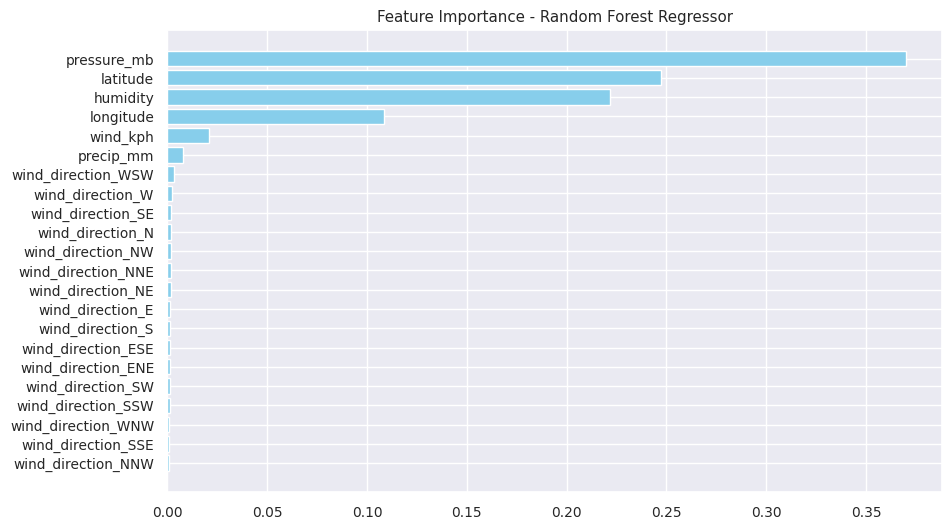

In [78]:
col = x_train.columns.tolist()
feature_names =  col
# Get Feature Importance
importances = forestmodel.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance - Random Forest Regressor")
plt.gca().invert_yaxis()
plt.show()


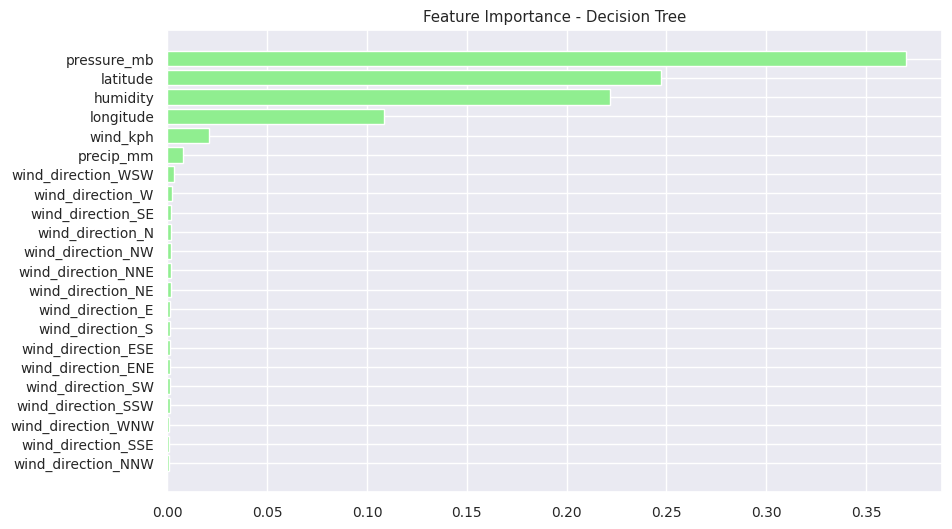

In [79]:
# Get Feature Importance
importances1 = regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.title("Feature Importance - Decision Tree")
plt.gca().invert_yaxis()
plt.show()

In [80]:
from sklearn.inspection import permutation_importance

In [81]:
perm = permutation_importance(
    forestmodel,
    x_test,
    y_test,
    scoring= "neg_mean_absolute_error", # we can use any metric
    n_repeats=5,
    random_state=0,
)

importance = pd.DataFrame(
    {"importance_mean": perm["importances_mean"],
     "importance_std": perm["importances_std"]},
    index=forestmodel.feature_names_in_)

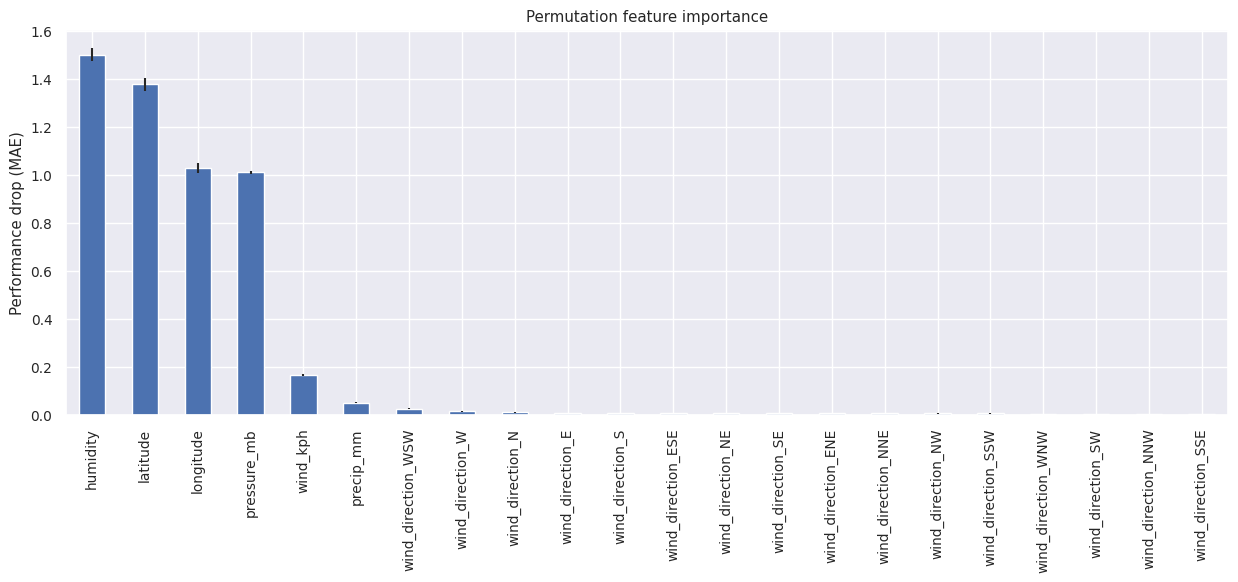

In [82]:
importance["importance_mean"].sort_values(
    ascending=False
).plot(figsize=(15, 5), kind="bar", yerr=importance["importance_std"])
plt.title("Permutation feature importance")
plt.ylabel("Performance drop (MAE)")
plt.show()

###Partial Dependence Plots

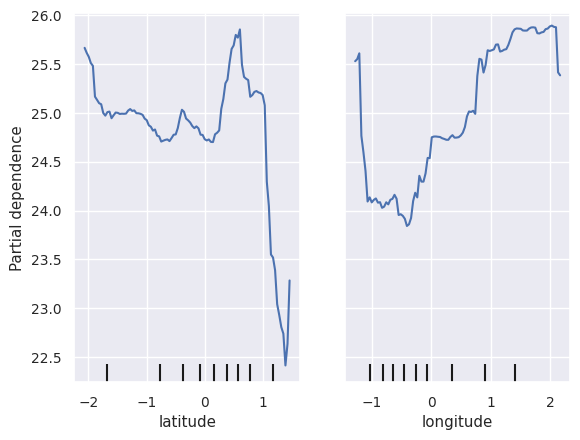

In [83]:
features = [0,1]
model = forestmodel
PartialDependenceDisplay.from_estimator(model, x_test, features, kind='average')

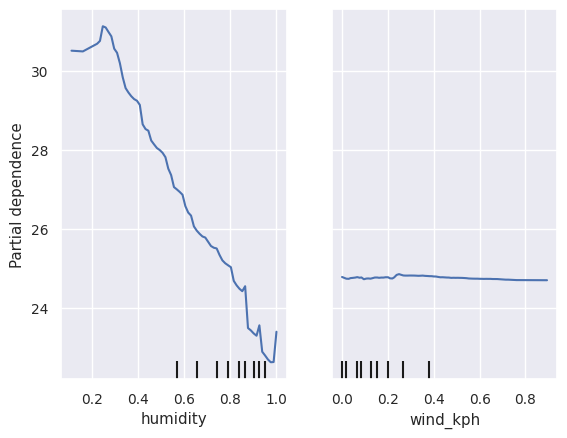

In [84]:
features = [2,3]
model = forestmodel
PartialDependenceDisplay.from_estimator(model, x_test, features, kind='average')

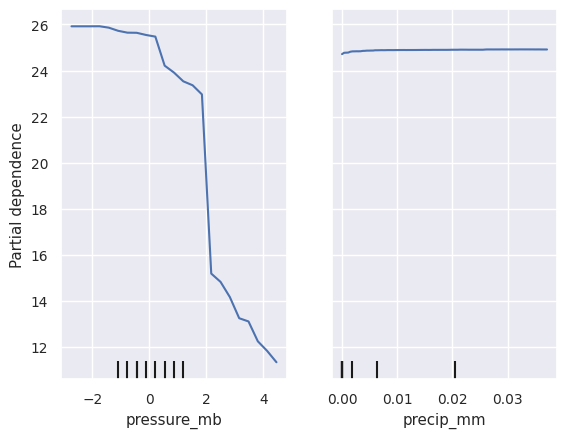

In [85]:
features = [4,5]
model = forestmodel
PartialDependenceDisplay.from_estimator(model, x_test, features, kind='average')

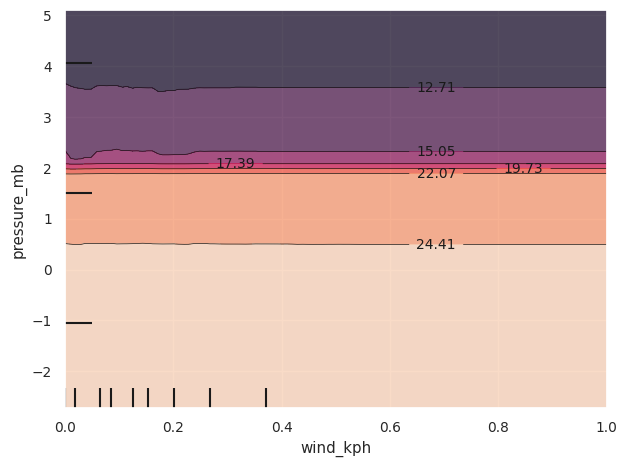

In [86]:
from sklearn.inspection import PartialDependenceDisplay
features = [(3, 4)]  # Replace with indices or feature names for your features of interest
PartialDependenceDisplay.from_estimator(model, x_train, features, kind='average')

# Show the plot
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [87]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(x_train, y_train)
# print(grid_search.best_params_)

In [88]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(x_train, y_train)
print(random_search.best_params_)

In [89]:
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

In [90]:
forestmodel_tune =RandomForestRegressor(
                                   n_estimators=152,
                                   min_samples_split=3,
                                   min_samples_leaf=1,
                                   max_depth=42,
                                   random_state=77,
                                   n_jobs=-1)


forestmodel_tune.fit(x_train, y_train)

y_pred_tune = forestmodel_tune.predict(x_test)

model_accuracy_tune=r2_score(y_test,y_pred_tune)*100
print(" Accuracy of the model is %.2f" %model_accuracy_tune)

 Accuracy of the model is 93.72


In [91]:
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(x_test)

NameError: name 'random_search' is not defined

In [92]:
#evaluating tuned model on test set
mae_tuned = mean_absolute_error(y_test, y_pred_best)
print(f"Mean Absolute Error (Tuned Model): {mae_tuned}")
model_accuracy=r2_score(y_test,y_pred_best)*100
print(f"Accuracy of the model is %.2f" %model_accuracy)

NameError: name 'y_pred_best' is not defined

In [ ]:
cv_results = pd.DataFrame(random_search.cv_results_)
print(cv_results[['mean_test_score', 'std_test_score', 'params']])

In [ ]:
best_rf_model = random_search.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)
y_pred_rf
model_accuracy=r2_score(y_test,y_pred_rf)*100
print(f"Accuracy of the model is %.2f" %model_accuracy)

Since the tuned model accuracy is slightly less than the original model accuracy, the original model is chosen to predict the temperature. Mean Absolute Error is also lower for the original model.

#### Conclusion:
- The **Random Forest Regressor** is the final selected model for this task, as it yields the best performance based on the **RMSE** and **R2 score**. With an **MAE** of 0.604 and an **R2 score** of 0.9377, it demonstrates the highest predictive accuracy among all models.
- Other models such as **Linear Regression**, **SGD Regressor** and **Decision Tree** showed competitive performance, but Random Forest provided the most balanced results across both training and testing sets.
- The **Lasso Regression** models performed the least, with relatively high **RMSE** and lower **R2 scores**.

Thus, **Random Forest Regressor** is the best choice for predicting the target variable in this dataset.

#Advanced Model

In [93]:
gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1,
                                random_state = 42,
                                max_features = 5)

# Fit to training set
gbr.fit(x_train, y_train)

# Predict on test set
pred_ygbr = gbr.predict(x_test)

# test set RMSE
test_rmse = mean_squared_error(y_test, pred_ygbr) ** (1 / 2)
mse = mean_squared_error(y_test, pred_ygbr)
r2_score_ygbr = r2_score(y_test, pred_ygbr)
mae_gbr=mean_absolute_error(y_test, pred_ygbr)
# Print rmse
model_accuracy=r2_score(y_test,pred_ygbr)*100
print(f"Accuracy of the model is %.2f" %model_accuracy)
print('Root mean Square error: {:.2f}'.format(test_rmse))
print("The r2 score using XGBoost is {}".format(r2_score_ygbr))
print('The mean absolute error: {:.2f}'.format(mae_gbr))

Accuracy of the model is 69.34
Root mean Square error: 2.17
The r2 score using XGBoost is 0.6933920686026585
The mean absolute error: 1.41


In [95]:
!pip install xgboost

In [94]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()

xgb_reg.fit(x_train, y_train)

# Predicting the moodel
y_pred5 = xgb_reg.predict(x_test)

# Evaluation Metrics
xgb_reg_mse = mean_squared_error(y_test, y_pred5)
xgb_reg_r2_score = r2_score(y_test, y_pred5)
model_accuracy=r2_score(y_test,y_pred5)*100

print(f"Accuracy of the model is %.2f" %model_accuracy)
print("The mean square error using XGBoost is {}".format(xgb_reg_mse))
print("The r2 score using XGBoost is {}".format(xgb_reg_r2_score))

Accuracy of the model is 93.82
The mean square error using XGBoost is 0.9473813772201538
The r2 score using XGBoost is 0.9382407665252686


In [96]:
encoder_file_1 = 'encoder_1.pkl'
scaler_file_1 = 'scaler_1.pkl'
minmax_file_1 = 'minmax_1.pkl'
model_file_rf = 'final_model_rf.pkl'

In [97]:
with open(encoder_file_1, 'wb') as f:
    pickle.dump(encoder, f)
with open(scaler_file_1, 'wb') as f:
    pickle.dump(std, f)
with open(minmax_file_1, 'wb') as f:
    pickle.dump(minmax, f)
with open(model_file_rf, 'wb') as f:
    pickle.dump(forestmodel, f)